# ALS Project

## Labs
- multi-subject
- make this tidy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
#from functools import reduce
import pickle

In [2]:
def make_lower(val):
    w=val.lower()
    return w

In [80]:
#load original csv file
labs = pd.read_csv("data/Labs.csv")

In [81]:
labs.head(20)

,subject_id,Test_Name,Test_Result,Test_Unit,Laboratory_Delta
0,329,Hemoglobin,130,g/L,0.0
1,329,Urine Color,YELLOW,NaN,0.0
2,329,Uric Acid,237.92,umol/L,0.0
3,329,ALPHA2-GLOBULIN,1,g/dL,0.0
4,329,Sodium,138,mmol/L,0.0
5,329,Glucose,-,NaN,0.0
6,329,Chloride,105,mmol/L,0.0
7,329,Bicarbonate,21,mmol/L,0.0
8,329,Segmented Neutrophils,66,%,0.0
9,329,Platelets,273,10E9/L,0.0


In [82]:
labs['study_day'] = labs["Laboratory_Delta"]
labs.drop("Laboratory_Delta", axis=1, inplace=True)

In [83]:
print(labs.shape)
labs.head()

(2445059, 5)


,subject_id,Test_Name,Test_Result,Test_Unit,study_day
0,329,Hemoglobin,130,g/L,0.0
1,329,Urine Color,YELLOW,NaN,0.0
2,329,Uric Acid,237.92,umol/L,0.0
3,329,ALPHA2-GLOBULIN,1,g/dL,0.0
4,329,Sodium,138,mmol/L,0.0


In [84]:
# make lowercase location column
labs['test_name'] = labs['Test_Name'].apply(make_lower)

In [85]:
# what do test look like?
#sorted(list(labs['test_name'].unique()))

In [86]:
# what are the common lab tests?
tests = labs['test_name'].value_counts(ascending=True)
x = tests[tests<100]

In [87]:
len(x) # number of tests less than 100

93

In [88]:
len(tests) # total number of tests

222

In [89]:
#list(x.index)  # see which tests are too uncommon

In [90]:
# get rid of any tests where less than 100 values exist.
labs = labs[ ~labs['test_name'].isin(list(x.index))]

In [91]:
# check few tests gone from dataset = yes
#labs['test_name'].value_counts(ascending=True)

In [92]:
labs.head()

,subject_id,Test_Name,Test_Result,Test_Unit,study_day,test_name
0,329,Hemoglobin,130,g/L,0.0,hemoglobin
1,329,Urine Color,YELLOW,NaN,0.0,urine color
2,329,Uric Acid,237.92,umol/L,0.0,uric acid
3,329,ALPHA2-GLOBULIN,1,g/dL,0.0,alpha2-globulin
4,329,Sodium,138,mmol/L,0.0,sodium


In [93]:
# there are missing samples
labs[ (labs['subject_id']==329) & (labs['study_day']==0)]['test_name'].value_counts()

protein                                      2
red blood cells (rbc)                        2
glucose                                      2
white blood cell (wbc)                       2
segmented neutrophils                        1
mean corpuscular hemoglobin                  1
urine appearance                             1
immunoglobulin a                             1
sodium                                       1
bilirubin (direct)                           1
urine specific gravity                       1
partial thromboplastin time                  1
bicarbonate                                  1
alpha2-globulin                              1
chloride                                     1
lymphocytes                                  1
lactate dehydrogenase                        1
bilirubin (total)                            1
calcium                                      1
urine color                                  1
absolute eosinophil count                    1
immunoglobuli

In [94]:
dups = ['red blood cells (rbc)', 'glucose', 'protein', 'white blood cell (wbc)']

In [95]:
labs[ (labs['subject_id']==329) & (labs['study_day']==0) & 
            (labs['test_name'].isin(dups))]

,subject_id,Test_Name,Test_Result,Test_Unit,study_day,test_name
5,329,Glucose,-,NaN,0.0,glucose
10,329,Red Blood Cells (RBC),2000,10E9/L,0.0,red blood cells (rbc)
11,329,Glucose,4.9395,mmol/L,0.0,glucose
25,329,Protein,70,g/L,0.0,protein
35,329,Protein,-,NaN,0.0,protein
37,329,White Blood Cell (WBC),10,10E9/L,0.0,white blood cell (wbc)
39,329,White Blood Cell (WBC),7.5,NaN,0.0,white blood cell (wbc)
49,329,Red Blood Cells (RBC),6000,10E9/L,0.0,red blood cells (rbc)


In [96]:
# replace the '-' with nans
labs['Test_Result'].replace('-', np.NaN, inplace=True)

In [97]:
labs[ (labs['subject_id']==329) & (labs['study_day']==0)]

,subject_id,Test_Name,Test_Result,Test_Unit,study_day,test_name
0,329,Hemoglobin,130,g/L,0.0,hemoglobin
1,329,Urine Color,YELLOW,NaN,0.0,urine color
2,329,Uric Acid,237.92,umol/L,0.0,uric acid
3,329,ALPHA2-GLOBULIN,1,g/dL,0.0,alpha2-globulin
4,329,Sodium,138,mmol/L,0.0,sodium
5,329,Glucose,NaN,NaN,0.0,glucose
6,329,Chloride,105,mmol/L,0.0,chloride
7,329,Bicarbonate,21,mmol/L,0.0,bicarbonate
8,329,Segmented Neutrophils,66,%,0.0,segmented neutrophils
9,329,Platelets,273,10E9/L,0.0,platelets


In [98]:
# remove old 'Test_Name'
labs.drop('Test_Name', axis=1, inplace=True)

In [99]:
print(labs.shape)
labs.head()

(2444028, 5)


,subject_id,Test_Result,Test_Unit,study_day,test_name
0,329,130,g/L,0.0,hemoglobin
1,329,YELLOW,NaN,0.0,urine color
2,329,237.92,umol/L,0.0,uric acid
3,329,1,g/dL,0.0,alpha2-globulin
4,329,138,mmol/L,0.0,sodium


In [100]:
# drop all observations from labs where 2 values are missing
labs.dropna(subset=['Test_Result'], inplace=True, how ='any', axis=0)

In [101]:
print(labs.shape)
labs.head(50)

(2394069, 5)


,subject_id,Test_Result,Test_Unit,study_day,test_name
0,329,130,g/L,0.0,hemoglobin
1,329,YELLOW,NaN,0.0,urine color
2,329,237.92,umol/L,0.0,uric acid
3,329,1,g/dL,0.0,alpha2-globulin
4,329,138,mmol/L,0.0,sodium
6,329,105,mmol/L,0.0,chloride
7,329,21,mmol/L,0.0,bicarbonate
8,329,66,%,0.0,segmented neutrophils
9,329,273,10E9/L,0.0,platelets
10,329,2000,10E9/L,0.0,red blood cells (rbc)


In [102]:
# there are missing samples
labs[ (labs['subject_id']==329) & (labs['study_day']==0)]['test_name'].value_counts()

red blood cells (rbc)                        2
white blood cell (wbc)                       2
alpha2-globulin                              1
chloride                                     1
mean corpuscular hemoglobin                  1
urine appearance                             1
immunoglobulin a                             1
sodium                                       1
bilirubin (direct)                           1
urine specific gravity                       1
partial thromboplastin time                  1
bicarbonate                                  1
segmented neutrophils                        1
protein                                      1
lymphocytes                                  1
lactate dehydrogenase                        1
bilirubin (total)                            1
calcium                                      1
urine color                                  1
absolute eosinophil count                    1
immunoglobulin g                             1
free t4      

In [103]:
# drop the white blood cells without a unit.
labs.drop(labs[ (labs['test_name']=='white blood cell (wbc)') & 
               (pd.isna(labs['Test_Unit'])==True)].index, inplace=True)

In [109]:
print(labs.shape)
labs.head()

(2389645, 5)


,subject_id,Test_Result,Test_Unit,study_day,test_name
0,329,130,g/L,0.0,hemoglobin
1,329,YELLOW,NaN,0.0,urine color
2,329,237.92,umol/L,0.0,uric acid
3,329,1,g/dL,0.0,alpha2-globulin
4,329,138,mmol/L,0.0,sodium


In [110]:
labs[ (labs['subject_id']==329) & (labs['test_name']=='red blood cells (rbc)')]

,subject_id,Test_Result,Test_Unit,study_day,test_name
49,329,6000,10E9/L,0.0,red blood cells (rbc)
58,329,5000,10E9/L,42.0,red blood cells (rbc)
122,329,5000,10E9/L,72.0,red blood cells (rbc)
172,329,6000,10E9/L,106.0,red blood cells (rbc)
194,329,6000,10E9/L,135.0,red blood cells (rbc)
267,329,5000,10E9/L,168.0,red blood cells (rbc)
287,329,500,10E9/L,189.0,red blood cells (rbc)
311,329,5000,10E9/L,189.0,red blood cells (rbc)
340,329,5000,10E9/L,212.0,red blood cells (rbc)
393,329,6000,10E9/L,247.0,red blood cells (rbc)


In [111]:
# make a table of just 'red blood cells (rbc)'
red = labs[labs['test_name']=='red blood cells (rbc)']

In [112]:
red.head()

,subject_id,Test_Result,Test_Unit,study_day,test_name
49,329,6000,10E9/L,0.0,red blood cells (rbc)
58,329,5000,10E9/L,42.0,red blood cells (rbc)
122,329,5000,10E9/L,72.0,red blood cells (rbc)
172,329,6000,10E9/L,106.0,red blood cells (rbc)
194,329,6000,10E9/L,135.0,red blood cells (rbc)


In [113]:
# keep only red blood cell values with higher score
for subject in list(red['subject_id'].unique()):
    # index of all the redblood cells test results for this subject
    inx = list(red[ (red['subject_id']==subject) &
                (red['test_name']=='red blood cells (rbc)') ].index)
    if len(inx)>1:
        # unique days for this subject
        days=red.iloc[inx,3].unique()
        # for each unique day
        for d in days:
            # table of unique days
            near = red[ (red['subject_id']==subject) &
                        (red['study_day']== d) & 
                        (red['test_name']=='red blood cells (rbc)')]['Test_Result'].astype(float)
            # drop the row from labs table with lowest RBC value
            if len(near)>1:
                labs.drop(near.idxmin(), inplace=True)


IndexError: positional indexers are out-of-bounds

In [114]:
print(labs.shape)
labs.head()

(2389640, 5)


,subject_id,Test_Result,Test_Unit,study_day,test_name
0,329,130,g/L,0.0,hemoglobin
1,329,YELLOW,NaN,0.0,urine color
2,329,237.92,umol/L,0.0,uric acid
3,329,1,g/dL,0.0,alpha2-globulin
4,329,138,mmol/L,0.0,sodium


In [115]:
# add the onset data
tdrod = pd.read_csv("clean_data/tdrod.csv")

In [116]:
tdrod.head()

,subject_id,Study_Arm,Subject_Died,death_days_trail_start,Subject_used_Riluzole,Onset_Delta,Diagnosis_Delta,delta_onset_diag,death_day_since_onset,death_day_mean_delta,...,Race_Asian,Race_Black_African_American,Race_Hawaiian_Pacific_Islander,Race_Unknown,Race_Caucasian,Race_Other,Race_Other_Specify,sex,age_trial_start_years,age_trial_start_days
0,89,Active,1.0,218.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,NaN,1.0,NaN,NaN
1,329,Active,NaN,NaN,NaN,-1706.0,-1068.0,638.0,NaN,NaN,...,0,1,0,NaN,0,0,NaN,0.0,38.0,13870.0
2,348,Placebo,NaN,NaN,1.0,-501.0,-302.0,199.0,NaN,NaN,...,0,0,0,NaN,1,0,NaN,0.0,52.0,18980.0
3,406,Active,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,NaN,1.0,NaN,NaN
4,411,Active,1.0,141.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,NaN,1.0,NaN,NaN


In [126]:
onset_dates = tdrod[['subject_id', 'Study_Arm', 'Onset_Delta']]

In [127]:
onset_dates.head()

,subject_id,Study_Arm,Onset_Delta
0,89,Active,NaN
1,329,Active,-1706.0
2,348,Placebo,-501.0
3,406,Active,NaN
4,411,Active,NaN


In [128]:
# merge onset data with labs
labs_onset = labs.merge(onset_dates, how='left', on='subject_id')

In [129]:
print(labs_onset.shape)
labs_onset.head()

(2389640, 7)


,subject_id,Test_Result,Test_Unit,study_day,test_name,Study_Arm,Onset_Delta
0,329,130,g/L,0.0,hemoglobin,Active,-1706.0
1,329,YELLOW,NaN,0.0,urine color,Active,-1706.0
2,329,237.92,umol/L,0.0,uric acid,Active,-1706.0
3,329,1,g/dL,0.0,alpha2-globulin,Active,-1706.0
4,329,138,mmol/L,0.0,sodium,Active,-1706.0


In [130]:
labs_onset['days_from_onset'] = np.abs(labs_onset['Onset_Delta']) + labs_onset['study_day']

In [132]:
labs_onset.drop('Onset_Delta', axis=1, inplace=True)

In [133]:
labs_onset.head()

,subject_id,Test_Result,Test_Unit,study_day,test_name,Study_Arm,days_from_onset
0,329,130,g/L,0.0,hemoglobin,Active,1706.0
1,329,YELLOW,NaN,0.0,urine color,Active,1706.0
2,329,237.92,umol/L,0.0,uric acid,Active,1706.0
3,329,1,g/dL,0.0,alpha2-globulin,Active,1706.0
4,329,138,mmol/L,0.0,sodium,Active,1706.0


In [138]:
#separate lab data into several smaller tables

lab_dfs=[]
for inx, t in enumerate(list(labs_onset['test_name'].unique())):
    new_lab = labs_onset[ labs_onset['test_name'] == t].copy().reset_index(drop=True)
    new_lab[t]=new_lab['Test_Result']
    new_lab[t+' unit']=new_lab['Test_Unit']
    new_lab.drop(['test_name', 'Test_Unit', 'Test_Result'], axis=1, inplace=True)
    if inx == 0:
        final_lab = new_lab
    lab_dfs.append(new_lab)

In [139]:
# pickle the table list
with open('labs_list.pkl', 'wb') as f:
    pickle.dump(lab_dfs, f)

## Explore the data

In [140]:
# open the pickle file
with open('labs_list.pkl', 'rb') as f:
    labs_dfs = pickle.load(f)

In [142]:
hemo=labs_dfs[0]

In [143]:
hemo.head()

,subject_id,study_day,Study_Arm,days_from_onset,hemoglobin,hemoglobin unit
0,329,0.0,Active,1706.0,130,g/L
1,329,42.0,Active,1748.0,120,g/L
2,329,72.0,Active,1778.0,120,g/L
3,329,106.0,Active,1812.0,120,g/L
4,329,135.0,Active,1841.0,120,g/L


In [144]:
def plot_lab_result(df, subset_factor=None):
    if subset_factor!=None:
        f1 = 
    
    subjects = df['subject_id'].unique()
    test = df.columns[4]
    unit = df.iloc[0,5]

    print("Number of subjects: {}".format(len(subjects)))
    print("Number results in table: {}".format(len(hemo)))
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
    
    # make a line for each subject
    for subject in subjects:
        sub = df[ df['subject_id'] == subject]
        ''' # color by death
        if np.any(sub['Subject_Died']=='Yes'):
            color = 'red'
        else:
            color = 'gray'
        '''
        color='gray'
        # if factor == to some value:
            ax1.plot(sub['days_since_onset'], sub['ALSFRS_Total'], color=color,
                     alpha=0.5, linewidth=1)
        else:
            ax2.plot(sub['days_since_onset'], sub['ALSFRS_R_Total'], color=color,
                     alpha=0.5, linewidth=1)
    
        
        
        
        plt.plot(sub['days_from_onset'], sub[test], color=color,
                     alpha=0.5, linewidth=1)
    
    # plotting particulars
    if subset_factor!=None:
        ax1.set_title("{} : {} ".format(test, ))
        ax2.set_title('Revised Function Assess')
    else:
        plt.title(test)
    plt.xlabel("days_from_onset")
    plt.ylabel(text+" "+unit)
    #plt.ylim(bottom=0, top=50)
    #plt.xlim(left=0, right=4000)
    plt.show()

Number of subjects: 7452
Number results in table: 64070


NameError: name 'text' is not defined

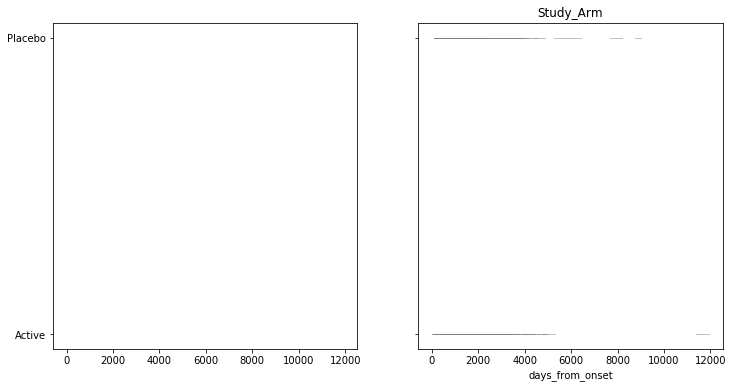

In [145]:
plot_lab_result(hemo)

## Make one big labs table

In [38]:
# open the pickle file
with open('labs_list.pkl', 'rb') as f:
    labs_dfs = pickle.load(f)

In [39]:
len(labs_dfs)

128

In [75]:
labs_dfs[0].head(10)

,subject_id,study_day,hemoglobin,hemoglobin unit
0,329,0.0,130,g/L
1,329,42.0,120,g/L
2,329,72.0,120,g/L
3,329,106.0,120,g/L
4,329,135.0,120,g/L
5,329,168.0,120,g/L
6,329,189.0,120,g/L
7,329,212.0,120,g/L
8,329,247.0,120,g/L
9,329,274.0,120,g/L


In [41]:
# get length of tables
table_len=[]
for i in range(len(labs_dfs)):
    table_len.append((i,len(labs_dfs[i])))
table_len=sorted(table_len, key=lambda x: x[1], reverse=True)

In [58]:
# get top 2 longest tables and merge
for i in range(3):
    inx = table_len[i][0]
    print(len(labs_dfs[inx]))
    if i ==0:
        new_table = labs_dfs[inx].copy()
    else:
        new_table = new_table.merge(labs_dfs[inx], how='outer', 
                                    on=['subject_id', 'study_day'])#,  indicator=True)

73646
70360
64655


In [59]:
print(new_table.shape)
new_table.head()

(91767, 8)


,subject_id,study_day,alt(sgpt),alt(sgpt) unit,ast(sgot),ast(sgot) unit,bilirubin (total),bilirubin (total) unit
0,329,0.0,18,U/L,20,U/L,0,umol/L
1,329,42.0,49,U/L,30,U/L,0,umol/L
2,329,72.0,29,U/L,21,U/L,17.104,umol/L
3,329,106.0,21,U/L,17,U/L,17.104,umol/L
4,329,135.0,9,U/L,10,U/L,17.104,umol/L


In [51]:
new_table['_merge'].value_counts()

both          73888
left_only      3354
right_only      103
Name: _merge, dtype: int64

In [73]:
# get top 2 longest tables and merge
for i in range(2,4):
    inx = table_len[i][0]
    print(len(labs_dfs[inx]))
    if i ==0:
        x = labs_dfs[inx].copy()
    else:
        new_table = x.merge(labs_dfs[inx], how='outer', 
                                    on=['subject_id', 'study_day'], indicator=True)
    

64655
64070


In [74]:
print(new_table.shape)
new_table.head()

(78052, 7)


,subject_id,study_day,alt(sgpt),alt(sgpt) unit,hemoglobin,hemoglobin unit,_merge
0,329,0.0,18,U/L,130,g/L,both
1,329,42.0,49,U/L,120,g/L,both
2,329,72.0,29,U/L,120,g/L,both
3,329,106.0,21,U/L,120,g/L,both
4,329,135.0,9,U/L,120,g/L,both


In [100]:
# get top 6 longest tables and merge
for i in range(5,6):
    inx = table_len[i][0]
    print(len(labs_dfs[inx]))
    if i ==0:
        new_table = labs_dfs[inx].copy()
    else:
        new_table = new_table.merge(labs_dfs[inx], how='outer', 
                                    on=['subject_id', 'study_day'])

63710


KeyboardInterrupt: 

In [ ]:
print(new_table.shape)
new_table.head()

In [3]:
for x in range(5,7):
    print(x)

5
6


In [98]:
sum((new_table['subject_id']==329) & (new_table['study_day']==0))

1

In [99]:
print(new_table.shape)
new_table.head(100)

(20811795, 16)


,subject_id,study_day,alt(sgpt),alt(sgpt) unit,ast(sgot),ast(sgot) unit,bilirubin (total),bilirubin (total) unit,hemoglobin,hemoglobin unit,red blood cells (rbc),red blood cells (rbc) unit,hematocrit_x,hematocrit unit_x,hematocrit_y,hematocrit unit_y
0,329,0.0,18,U/L,20,U/L,0,umol/L,130,g/L,6000,10E9/L,41,%,41,%
1,329,42.0,49,U/L,30,U/L,0,umol/L,120,g/L,5000,10E9/L,38,%,38,%
2,329,72.0,29,U/L,21,U/L,17.104,umol/L,120,g/L,5000,10E9/L,38,%,38,%
3,329,106.0,21,U/L,17,U/L,17.104,umol/L,120,g/L,6000,10E9/L,39,%,39,%
4,329,135.0,9,U/L,10,U/L,17.104,umol/L,120,g/L,6000,10E9/L,38,%,38,%
5,329,168.0,18,U/L,16,U/L,17.104,umol/L,120,g/L,5000,10E9/L,39,%,39,%
6,329,189.0,30,U/L,20,U/L,0,umol/L,120,g/L,5000,10E9/L,36,%,36,%
7,329,212.0,9,U/L,12,U/L,17.104,umol/L,120,g/L,5000,10E9/L,38,%,38,%
8,329,247.0,11,U/L,11,U/L,17.104,umol/L,120,g/L,6000,10E9/L,38,%,38,%
9,329,274.0,10,U/L,14,U/L,17.104,umol/L,120,g/L,5000,10E9/L,35,%,35,%


In [209]:
labs_final = reduce(lambda left,right: pd.merge(left,right,
                                              on=['subject_id','study_day'], 
                                              how='outer'), lab_dfs)

KeyboardInterrupt: 

In [210]:
# save to csv
filename = 'clean_data/labs_clean.csv'
labs_final.to_csv(filename, index=False)

NameError: name 'labs_final' is not defined